In [1]:
import uproot
import matplotlib.pyplot as plt 
import matplotlib as mpl
import mplhep as hep
import numpy as np
import fnmatch
import hist
from tqdm import tqdm
from scipy.signal import find_peaks
import pandas as pd
import os
import sys, importlib

import warnings
warnings.filterwarnings("ignore", category=Warning)

from wc_helper import *
importlib.reload(sys.modules['wc_helper'])

<module 'wc_helper' from '/sbnd/app/users/lynnt/.venv/lib64/python3.6/site-packages/wc_helper.py'>

## Comparing performance with different filter values

In [43]:
list_of_sbnd_df = []
# iterate over files in directory
for filename in os.listdir("./pkl_sbnd/"):
    list_of_sbnd_df.append(pd.read_pickle("./pkl_sbnd/" +filename))
sbnd_df = pd.concat(list_of_sbnd_df)

sbnd_df = sbnd_df[sbnd_df.theta_xz < 50]

u_diff_arr_sb = sbnd_df["u"].to_numpy()
v_diff_arr_sb = sbnd_df["v"].to_numpy()
w_diff_arr_sb = sbnd_df["w"].to_numpy()

u_sim_arr_sb = sbnd_df["u_sim"].to_numpy()
v_sim_arr_sb = sbnd_df["v_sim"].to_numpy()
w_sim_arr_sb = sbnd_df["w_sim"].to_numpy()

u_dec_arr_sb = sbnd_df["u_dec"].to_numpy()
v_dec_arr_sb = sbnd_df["v_dec"].to_numpy()
w_dec_arr_sb = sbnd_df["w_dec"].to_numpy()

theta_xz_arr_sb = sbnd_df["theta_xz"].to_numpy()
depE_arr_sb = sbnd_df["depE"].to_numpy()

sbnd_df

,file,sub,tpc,u,v,w,u_sim,v_sim,w_sim,u_dec,v_dec,w_dec,theta_xz,depE
0,0.0,1.0,0.0,-0.291409,-0.216379,-0.024985,24057180.00,24053684.00,24064802.0,18628636.0,19774820.0,23478198.0,39.955383,0.936581
2,0.0,1.0,0.0,-0.125898,-0.148065,-0.029144,12253380.00,12263715.00,12258402.0,10883205.0,10682071.0,11911263.0,38.607414,0.474011
3,0.0,1.0,0.0,-0.115533,0.016384,-0.035720,4991036.50,4992440.50,4988981.0,4474128.0,5075598.0,4816919.0,26.314671,0.191347
4,0.0,1.0,0.0,-0.280737,-0.163913,-0.021194,5281844.00,5285180.50,5281290.0,4124065.0,4540873.0,5171682.0,49.262268,0.203635
6,0.0,1.0,0.0,-0.264276,-0.252005,-0.030381,28514184.00,28514152.00,28530570.0,22553764.0,22774792.0,27689342.0,4.392064,1.207146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,218.0,186.0,1.0,-0.262115,-0.246962,-0.026243,24222176.00,24214876.00,24217862.0,19191732.0,19419092.0,23598568.0,40.868252,0.965197
14,218.0,186.0,1.0,-0.271852,-0.302407,-0.034801,24415928.00,24434638.00,24439178.0,19197146.0,18761136.0,23617268.0,3.773916,1.105307
15,218.0,186.0,1.0,-0.121001,0.082326,-0.032141,4162915.75,4166375.75,4161172.5,3713569.0,4540149.0,4031594.0,0.124460,0.164259
17,218.0,186.0,1.0,-0.175428,-0.080810,-0.021742,6247998.50,6253054.50,6248727.0,5315509.0,5785525.0,6115758.0,29.264851,0.245915


In [44]:
list_of_uboone_df = []
# iterate over files in directory
for filename in os.listdir("./pkl_uboone/"):
    list_of_uboone_df.append(pd.read_pickle("./pkl_uboone/" +filename))
uboone_df = pd.concat(list_of_uboone_df)
uboone_df = uboone_df[uboone_df.theta_xz < 50]

u_diff_arr_ub = uboone_df["u"].to_numpy()
v_diff_arr_ub = uboone_df["v"].to_numpy()
w_diff_arr_ub = uboone_df["w"].to_numpy()

u_sim_arr_ub = uboone_df["u_sim"].to_numpy()
v_sim_arr_ub = uboone_df["v_sim"].to_numpy()
w_sim_arr_ub = uboone_df["w_sim"].to_numpy()

u_dec_arr_ub = uboone_df["u_dec"].to_numpy()
v_dec_arr_ub = uboone_df["v_dec"].to_numpy()
w_dec_arr_ub = uboone_df["w_dec"].to_numpy()

theta_xz_arr_ub = uboone_df["theta_xz"].to_numpy()
depE_arr_ub = uboone_df["depE"].to_numpy()

uboone_df.sort_values(by=['file','tpc'])

,file,sub,tpc,u,v,w,u_sim,v_sim,w_sim,u_dec,v_dec,w_dec,theta_xz,depE
0,0.0,1.0,0.0,-0.234606,-0.326959,-0.017529,24057180.00,24053684.00,24064802.0,19485712.0,18126930.0,23650226.0,39.955383,0.936581
2,0.0,1.0,0.0,-0.134409,-0.193465,-0.021911,12253380.00,12263715.00,12258402.0,10801552.0,10275721.0,11995570.0,38.607414,0.474011
3,0.0,1.0,0.0,-0.140490,-0.071852,-0.022903,4991036.50,4992440.50,4988981.0,4376220.0,4657772.0,4877278.0,26.314671,0.191347
4,0.0,1.0,0.0,-0.263827,-0.185748,-0.015518,5281844.00,5285180.50,5281290.0,4179247.0,4457256.0,5200587.0,49.262268,0.203635
6,0.0,1.0,0.0,-0.197109,-0.260128,-0.020943,28514184.00,28514152.00,28530570.0,23819204.0,22627976.0,27945304.0,4.392064,1.207146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,218.0,186.0,1.0,-0.208841,-0.318015,-0.022452,24222176.00,24214876.00,24217862.0,20037514.0,18372226.0,23686072.0,40.868252,0.965197
14,218.0,186.0,1.0,-0.239592,-0.352970,-0.028022,24415928.00,24434638.00,24439178.0,19696744.0,18060004.0,23773004.0,3.773916,1.105307
15,218.0,186.0,1.0,-0.083344,-0.077272,-0.019061,4162915.75,4166375.75,4161172.5,3842653.0,3867525.0,4083341.0,0.124460,0.164259
17,218.0,186.0,1.0,-0.164523,-0.139962,-0.013517,6247998.50,6253054.50,6248727.0,5365284.0,5485319.0,6165389.0,29.264851,0.245915


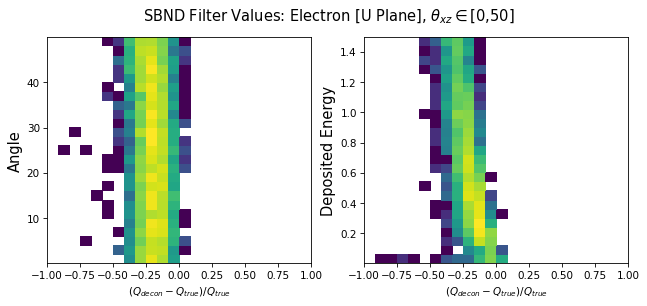

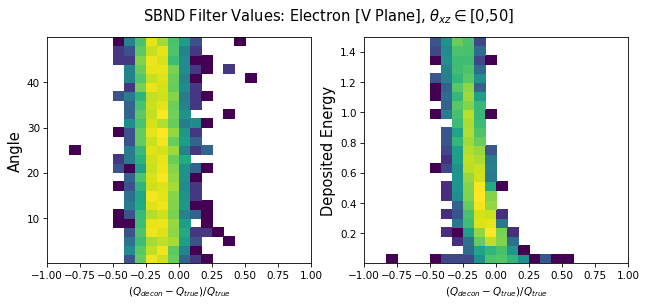

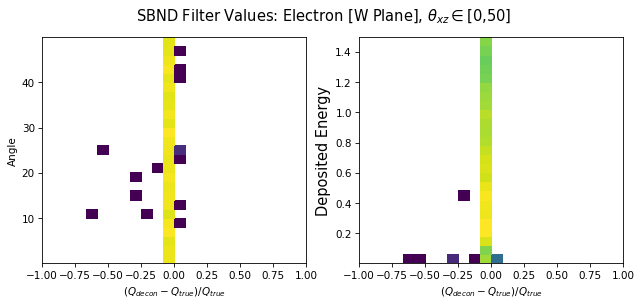

In [45]:
fig, axes = plt.subplots(1,2,figsize=(10,4),dpi=75)
axes[0].hist2d(u_diff_arr_sb,theta_xz_arr_sb,bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[1].hist2d(u_diff_arr_sb,depE_arr_sb,    bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[0].set_ylabel("Angle",fontsize=14)
axes[1].set_ylabel("Deposited Energy",fontsize=14)
axes[0].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")
axes[1].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")

plt.suptitle(r"SBND Filter Values: Electron [U Plane], $\theta_{xz} \in $[0,50]",fontsize=14)
plt.show()

fig, axes = plt.subplots(1,2,figsize=(10,4),dpi=75)
axes[0].hist2d(v_diff_arr_sb,theta_xz_arr_sb,bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[1].hist2d(v_diff_arr_sb,depE_arr_sb,    bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[0].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")
axes[1].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")

axes[0].set_ylabel("Angle",fontsize=14)
axes[1].set_ylabel("Deposited Energy",fontsize=14)
plt.suptitle(r"SBND Filter Values: Electron [V Plane], $\theta_{xz} \in $[0,50]",fontsize=14)
plt.show()

fig, axes = plt.subplots(1,2,figsize=(10,4),dpi=75)
axes[0].hist2d(w_diff_arr_sb,theta_xz_arr_sb,bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[1].hist2d(w_diff_arr_sb,depE_arr_sb,    bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[0].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")
axes[1].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")

axes[0].set_ylabel("Angle")
axes[1].set_ylabel("Deposited Energy",fontsize=14)
plt.suptitle(r"SBND Filter Values: Electron [W Plane], $\theta_{xz} \in $[0,50]",fontsize=14)
plt.show()

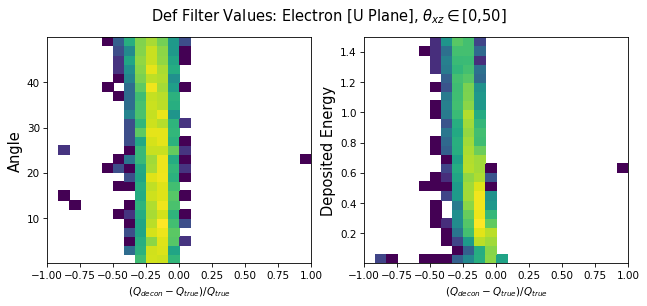

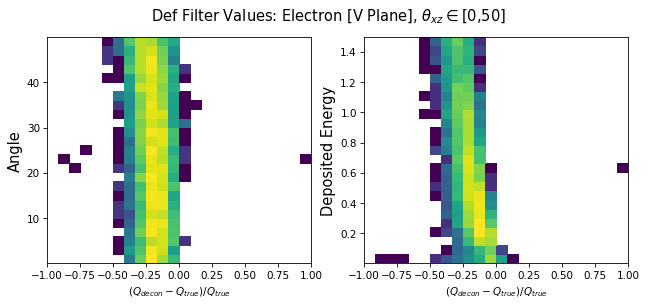

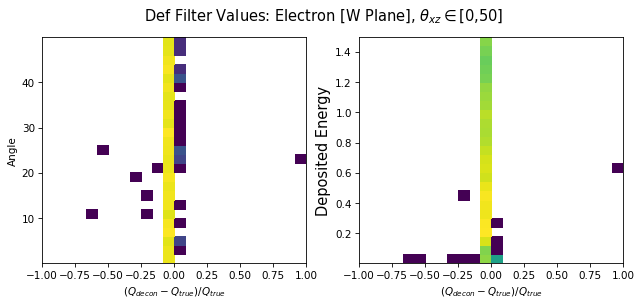

In [46]:
fig, axes = plt.subplots(1,2,figsize=(10,4),dpi=75)
axes[0].hist2d(u_diff_arr_ub,theta_xz_arr_ub,bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[1].hist2d(u_diff_arr_ub,depE_arr_ub,    bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[0].set_ylabel("Angle",fontsize=14)
axes[1].set_ylabel("Deposited Energy",fontsize=14)
axes[0].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")
axes[1].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")

plt.suptitle(r"Def Filter Values: Electron [U Plane], $\theta_{xz} \in $[0,50]",fontsize=14)
plt.show()

fig, axes = plt.subplots(1,2,figsize=(10,4),dpi=75)
axes[0].hist2d(v_diff_arr_ub,theta_xz_arr_ub,bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[1].hist2d(v_diff_arr_ub,depE_arr_ub,    bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[0].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")
axes[1].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")

axes[0].set_ylabel("Angle",fontsize=14)
axes[1].set_ylabel("Deposited Energy",fontsize=14)
plt.suptitle(r"Def Filter Values: Electron [V Plane], $\theta_{xz} \in $[0,50]",fontsize=14)
plt.show()

fig, axes = plt.subplots(1,2,figsize=(10,4),dpi=75)
axes[0].hist2d(w_diff_arr_ub,theta_xz_arr_ub,bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[1].hist2d(w_diff_arr_ub,depE_arr_ub,    bins=[np.linspace(-1,1,25),25],norm=mpl.colors.LogNorm())
axes[0].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")
axes[1].set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")

axes[0].set_ylabel("Angle")
axes[1].set_ylabel("Deposited Energy",fontsize=14)
plt.suptitle(r"Def Filter Values: Electron [W Plane], $\theta_{xz} \in $[0,50]",fontsize=14)
plt.show()

In [47]:
ticks= [0,5,10,20,30,40,50,60,70,80,85]
ticks_prime = np.zeros(len(ticks))
for i, tick in enumerate(ticks):
    ticks_prime[i] = np.round(np.arctan(np.tan(tick*np.pi/180)/np.cos(60*np.pi/180))*180/np.pi)
    
ticklabels = []
for i, angle in enumerate(ticks):
    ticklabels.append(str(int(angle)) + "(" + str(int(ticks_prime[i])) + ")")
energy_bins = np.linspace(0,1.5,11)
englabels = []
for i in energy_bins: 
    englabels.append(str(round(i,2)))

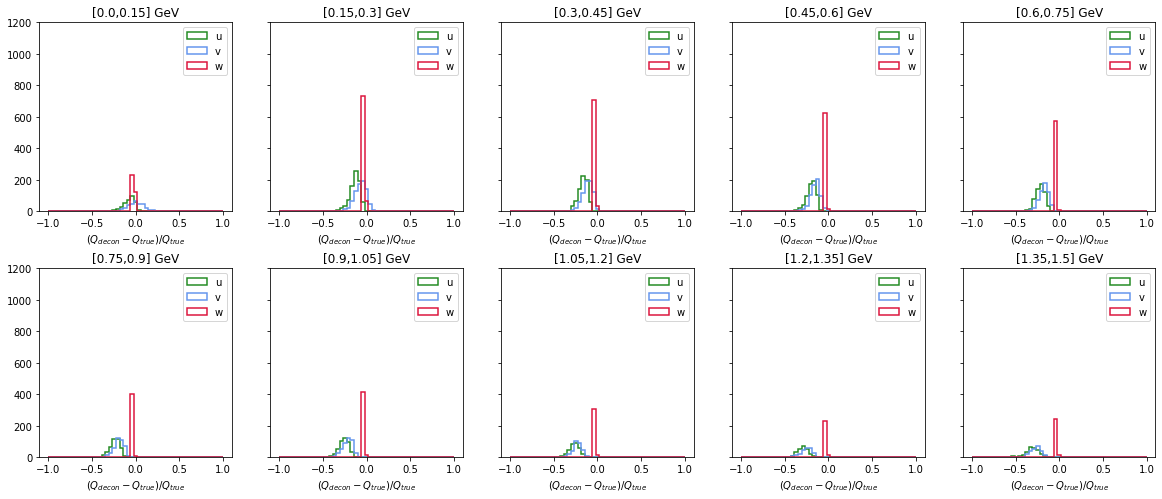

In [48]:
u_med_eng_sb = np.zeros(10); u_std_eng_sb = np.zeros(10)
v_med_eng_sb = np.zeros(10); v_std_eng_sb = np.zeros(10)
w_med_eng_sb = np.zeros(10); w_std_eng_sb = np.zeros(10)

fig, axes = plt.subplots(2,5,figsize=(20,8),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0.3)
for i, ax in enumerate(axes.flatten()):
    lower = energy_bins[i]
    upper = energy_bins[i+1]
    mask = np.where((depE_arr_sb < upper) & (depE_arr_sb >= lower),True,False)  
    u_med_eng_sb[i] = np.ma.median (np.ma.array(u_diff_arr_sb[mask], mask=np.isnan(u_diff_arr_sb[mask]))) 
    u_std_eng_sb[i] = quartile_reso(np.ma.array(u_diff_arr_sb[mask], mask=np.isnan(u_diff_arr_sb[mask]))) 
    v_med_eng_sb[i] = np.ma.median (np.ma.array(v_diff_arr_sb[mask], mask=np.isnan(v_diff_arr_sb[mask]))) 
    v_std_eng_sb[i] = quartile_reso(np.ma.array(v_diff_arr_sb[mask], mask=np.isnan(v_diff_arr_sb[mask]))) 
    w_med_eng_sb[i] = np.ma.median (np.ma.array(w_diff_arr_sb[mask], mask=np.isnan(w_diff_arr_sb[mask]))) 
    w_std_eng_sb[i] = quartile_reso(np.ma.array(w_diff_arr_sb[mask], mask=np.isnan(w_diff_arr_sb[mask]))) 
    
    ax.hist(u_diff_arr_sb[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="u",color="forestgreen")
    ax.hist(v_diff_arr_sb[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="v",color="cornflowerblue")
    ax.hist(w_diff_arr_sb[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="w",color="crimson")
    ax.tick_params(labelbottom=True)
    ax.set_ylim(0,1200)
    ax.legend()
    ax.set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")
    ax.set_title(fr"[{round(lower,3)},{round(upper,3)}] GeV")
plt.show()
    

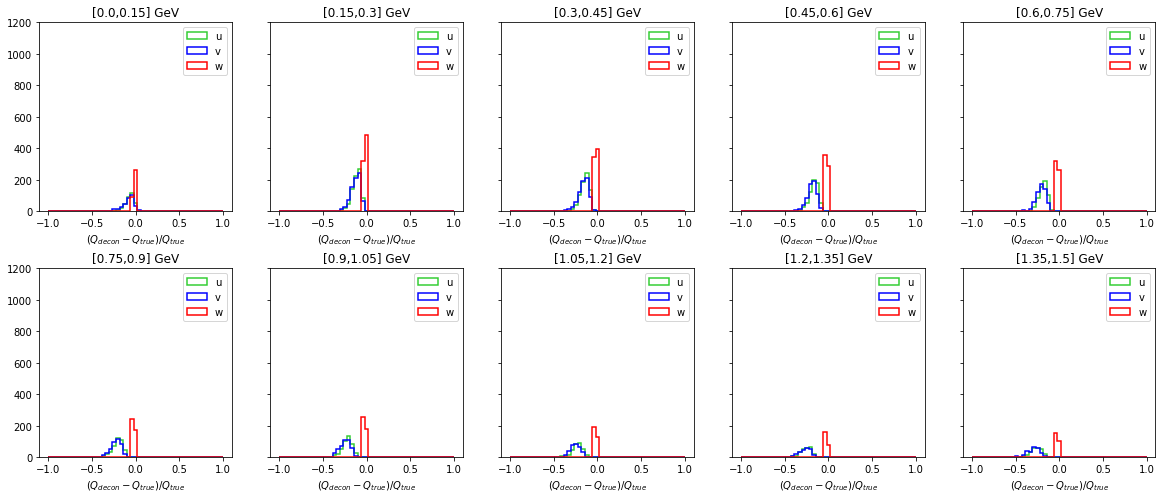

In [49]:
u_med_eng_ub = np.zeros(10); u_std_eng_ub = np.zeros(10)
v_med_eng_ub = np.zeros(10); v_std_eng_ub = np.zeros(10)
w_med_eng_ub = np.zeros(10); w_std_eng_ub = np.zeros(10)

fig, axes = plt.subplots(2,5,figsize=(20,8),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0.3)
for i, ax in enumerate(axes.flatten()):
    lower = energy_bins[i]
    upper = energy_bins[i+1]
    mask = np.where((depE_arr_ub < upper) & (depE_arr_ub >= lower),True,False)  
    u_med_eng_ub[i] = np.ma.median (np.ma.array(u_diff_arr_ub[mask], mask=np.isnan(u_diff_arr_ub[mask]))) 
    u_std_eng_ub[i] = quartile_reso(np.ma.array(u_diff_arr_ub[mask], mask=np.isnan(u_diff_arr_ub[mask]))) 
    v_med_eng_ub[i] = np.ma.median (np.ma.array(v_diff_arr_ub[mask], mask=np.isnan(v_diff_arr_ub[mask]))) 
    v_std_eng_ub[i] = quartile_reso(np.ma.array(v_diff_arr_ub[mask], mask=np.isnan(v_diff_arr_ub[mask]))) 
    w_med_eng_ub[i] = np.ma.median (np.ma.array(w_diff_arr_ub[mask], mask=np.isnan(w_diff_arr_ub[mask]))) 
    w_std_eng_ub[i] = quartile_reso(np.ma.array(w_diff_arr_ub[mask], mask=np.isnan(w_diff_arr_ub[mask]))) 
    
    ax.hist(u_diff_arr_ub[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="u",color="limegreen")
    ax.hist(v_diff_arr_ub[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="v",color="blue")
    ax.hist(w_diff_arr_ub[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="w",color="red")
    ax.set_ylim(0,1200)
    ax.tick_params(labelbottom=True)
    ax.legend()
    ax.set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")
    ax.set_title(fr"[{round(lower,3)},{round(upper,3)}] GeV")
plt.show()
    

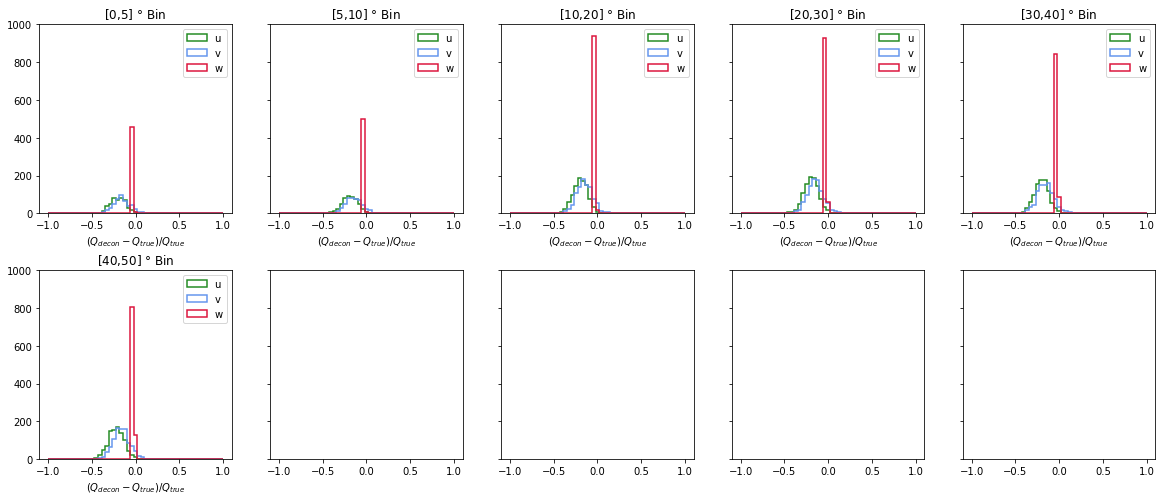

In [50]:
u_med_ang_sb = np.zeros(10); u_std_ang_sb = np.zeros(10)
v_med_ang_sb = np.zeros(10); v_std_ang_sb = np.zeros(10)
w_med_ang_sb = np.zeros(10); w_std_ang_sb = np.zeros(10)

fig, axes = plt.subplots(2,5,figsize=(20,8),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0.3)
for i, ax in enumerate(axes.flatten()):
    lower = ticks[i]
    upper = ticks[i+1]
    mask = np.where((theta_xz_arr_sb < upper) & (theta_xz_arr_sb >= lower),True,False)
    if mask.sum() == 0: continue
    u_med_ang_sb[i] = np.ma.median (np.ma.array(u_diff_arr_sb[mask], mask=np.isnan(u_diff_arr_sb[mask]))) 
    u_std_ang_sb[i] = quartile_reso(np.ma.array(u_diff_arr_sb[mask], mask=np.isnan(u_diff_arr_sb[mask]))) 
    v_med_ang_sb[i] = np.ma.median (np.ma.array(v_diff_arr_sb[mask], mask=np.isnan(v_diff_arr_sb[mask]))) 
    v_std_ang_sb[i] = quartile_reso(np.ma.array(v_diff_arr_sb[mask], mask=np.isnan(v_diff_arr_sb[mask]))) 
    w_med_ang_sb[i] = np.ma.median (np.ma.array(w_diff_arr_sb[mask], mask=np.isnan(w_diff_arr_sb[mask]))) 
    w_std_ang_sb[i] = quartile_reso(np.ma.array(w_diff_arr_sb[mask], mask=np.isnan(w_diff_arr_sb[mask]))) 
    
    ax.hist(u_diff_arr_sb[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="u",color="forestgreen")
    ax.hist(v_diff_arr_sb[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="v",color="cornflowerblue")
    ax.hist(w_diff_arr_sb[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="w",color="crimson")
    ax.tick_params(labelbottom=True)
    ax.set_ylim(0,1000)
    ax.legend()
    ax.set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")
    ax.set_title(fr"[{lower},{upper}] $\degree$ Bin")
    # plt.yscale("log")
plt.show()
    

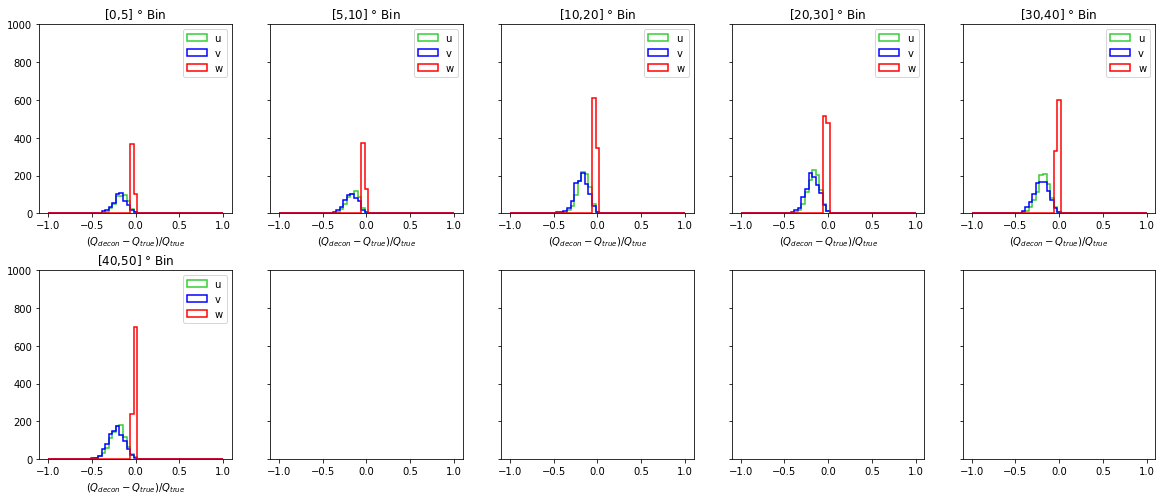

In [51]:
u_med_ang_ub = np.zeros(10); u_std_ang_ub = np.zeros(10)
v_med_ang_ub = np.zeros(10); v_std_ang_ub = np.zeros(10)
w_med_ang_ub = np.zeros(10); w_std_ang_ub = np.zeros(10)

fig, axes = plt.subplots(2,5,figsize=(20,8),sharex=True,sharey=True)
plt.subplots_adjust(hspace=0.3)
for i, ax in enumerate(axes.flatten()):
    lower = ticks[i]
    upper = ticks[i+1]
    mask = np.where((theta_xz_arr_ub < upper) & (theta_xz_arr_ub >= lower),True,False)
    if mask.sum() == 0: continue
    u_med_ang_ub[i] = np.ma.median (np.ma.array(u_diff_arr_ub[mask], mask=np.isnan(u_diff_arr_ub[mask]))) 
    u_std_ang_ub[i] = quartile_reso(np.ma.array(u_diff_arr_ub[mask], mask=np.isnan(u_diff_arr_ub[mask]))) 
    v_med_ang_ub[i] = np.ma.median (np.ma.array(v_diff_arr_ub[mask], mask=np.isnan(v_diff_arr_ub[mask]))) 
    v_std_ang_ub[i] = quartile_reso(np.ma.array(v_diff_arr_ub[mask], mask=np.isnan(v_diff_arr_ub[mask]))) 
    w_med_ang_ub[i] = np.ma.median (np.ma.array(w_diff_arr_ub[mask], mask=np.isnan(w_diff_arr_ub[mask]))) 
    w_std_ang_ub[i] = quartile_reso(np.ma.array(w_diff_arr_ub[mask], mask=np.isnan(w_diff_arr_ub[mask]))) 
    
    ax.hist(u_diff_arr_ub[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="u",color="limegreen")
    ax.hist(v_diff_arr_ub[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="v",color="blue")
    ax.hist(w_diff_arr_ub[mask],bins=np.linspace(-1,1,50),lw=1.5,histtype="step",label="w",color="red")
    ax.tick_params(labelbottom=True)
    ax.legend()
    ax.set_ylim(0,1000)
    ax.set_xlabel(r"$(Q_{decon} - Q_{true}) / Q_{true}$")
    ax.set_title(fr"[{lower},{upper}] $\degree$ Bin")
    # plt.yscale("log")
plt.show()
    

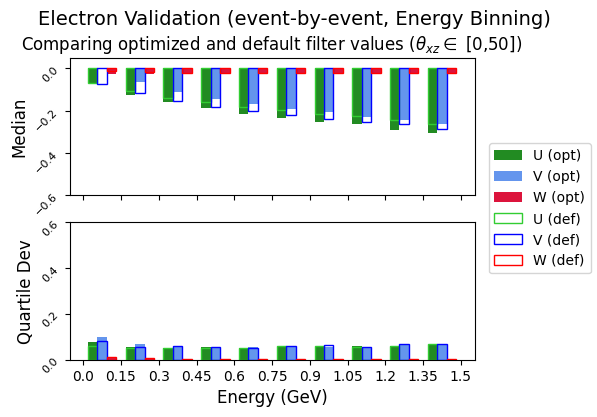

In [52]:
fig, axes = plt.subplots(2,1,figsize=(6,4),sharex=True,dpi=100)
plt.subplots_adjust(right=0.8)
N=10
width = 0.25
# ticklabels = ["0","5","10","20","30","40","50","60","70","80","85"]
axes[0].set_xticks(np.arange(N+1)-0.5)
axes[0].yaxis.set_tick_params(labelsize=8,rotation=45)
axes[0].bar(np.arange(N)-width, u_med_eng_sb,width=width,label="U (opt)",color="forestgreen")
axes[0].bar(np.arange(N)      , v_med_eng_sb,width=width,label="V (opt)",color="cornflowerblue")
axes[0].bar(np.arange(N)+width, w_med_eng_sb,width=width,label="W (opt)",color="crimson")

axes[0].bar(np.arange(N)-width, u_med_eng_ub,width=width,label="U (def)",fill=False,edgecolor="limegreen")
axes[0].bar(np.arange(N)      , v_med_eng_ub,width=width,label="V (def)",fill=False,edgecolor="blue")
axes[0].bar(np.arange(N)+width, w_med_eng_ub,width=width,label="W (def)",fill=False,edgecolor="red")

axes[0].set_ylabel("Median",fontsize=12)
axes[0].set_ylim(-0.60,0.05)
axes[0].set_title(r"Comparing optimized and default filter values ($\theta_{xz} \in$ [0,50])",fontsize=12)

fig.legend(loc=7)

axes[1].bar(np.arange(N)-width,u_std_eng_sb,width=width,label="U",color="forestgreen")
axes[1].bar(np.arange(N),      v_std_eng_sb,width=width,label="V",color="cornflowerblue")
axes[1].bar(np.arange(N)+width,w_std_eng_sb,width=width,label="W",color="crimson")

axes[1].bar(np.arange(N)-width, u_std_eng_ub,width=width,label="U",fill=False,edgecolor="limegreen")
axes[1].bar(np.arange(N)      , v_std_eng_ub,width=width,label="V",fill=False,edgecolor="blue")
axes[1].bar(np.arange(N)+width, w_std_eng_ub,width=width,label="W",fill=False,edgecolor="red")

axes[1].set_ylabel("Quartile Dev",fontsize=12)
axes[1].tick_params(labelbottom=True)
axes[1].set_yticks([0.0,0.2,0.4,0.6])
axes[1].yaxis.set_tick_params(labelsize=8,rotation=45)
axes[1].set_ylim(0,0.6)
axes[1].set_xticklabels(englabels)
axes[1].set_xlabel("Energy (GeV)",fontsize=12)

plt.suptitle("Electron Validation (event-by-event, Energy Binning)",fontsize=14,y=1.0)
plt.show()

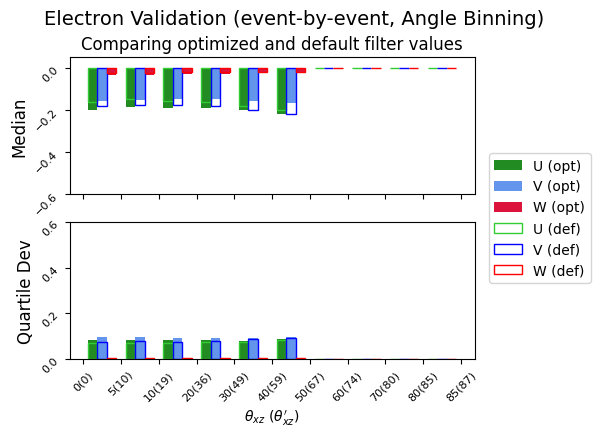

In [53]:
fig, axes = plt.subplots(2,1,figsize=(6,4),sharex=True,dpi=100)
# plt.subplots_adjust(hspace=0.08)
plt.subplots_adjust(right=0.8)

N=10
width = 0.25
axes[0].set_xticks(np.arange(N+1)-0.5)
axes[0].yaxis.set_tick_params(labelsize=8,rotation=45)
axes[0].bar(np.arange(N)-width, u_med_ang_sb,width=width,label="U (opt)",color="forestgreen")
axes[0].bar(np.arange(N)      , v_med_ang_sb,width=width,label="V (opt)",color="cornflowerblue")
axes[0].bar(np.arange(N)+width, w_med_ang_sb,width=width,label="W (opt)",color="crimson")

axes[0].bar(np.arange(N)-width, u_med_ang_ub,width=width,label="U (def)",fill=False,edgecolor="limegreen")
axes[0].bar(np.arange(N)      , v_med_ang_ub,width=width,label="V (def)",fill=False,edgecolor="blue")
axes[0].bar(np.arange(N)+width, w_med_ang_ub,width=width,label="W (def)",fill=False,edgecolor="red")
axes[0].set_title("Comparing optimized and default filter values")
fig.legend(loc=7)

axes[0].set_ylabel("Median",fontsize=12)
axes[0].set_ylim(-0.60,0.05)

axes[1].bar(np.arange(N)-width,u_std_ang_sb,width=width,label="U",color="forestgreen")
axes[1].bar(np.arange(N),      v_std_ang_sb,width=width,label="V",color="cornflowerblue")
axes[1].bar(np.arange(N)+width,w_std_ang_sb,width=width,label="W",color="crimson")

axes[1].bar(np.arange(N)-width, u_std_ang_ub,width=width,label="U",fill=False,edgecolor="limegreen")
axes[1].bar(np.arange(N)      , v_std_ang_ub,width=width,label="V",fill=False,edgecolor="blue")
axes[1].bar(np.arange(N)+width, w_std_ang_ub,width=width,label="W",fill=False,edgecolor="red")

axes[1].set_ylabel("Quartile Dev",fontsize=12)
axes[1].tick_params(labelbottom=True)
axes[1].set_yticks([0.0,0.2,0.4,0.6])
axes[1].yaxis.set_tick_params(labelsize=8,rotation=45)
axes[1].set_ylim(0,0.6)
axes[1].set_xticklabels(ticklabels)
axes[1].xaxis.set_tick_params(labelsize=8,rotation=45)
axes[1].set_xlabel(r"$\theta_{xz}$ ($\theta_{xz}'$)")

plt.suptitle("Electron Validation (event-by-event, Angle Binning)",fontsize=14,y=1.0)
plt.show()